In [1]:
import pandas as pd


In [183]:
df = pd.read_csv('reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [172]:
df.Rating.value_counts()

1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64

In [173]:
df.Rating.isnull().value_counts()

False    705
True     145
Name: Rating, dtype: int64

In [56]:
df.Review.isnull().value_counts()

False    705
Name: Review, dtype: int64

In [47]:
df.Rating[845]

nan

In [50]:
df.Review[845]

"I ordered two venti frappacino's without whipped cream (as my daughter and I are allergic to whipped cream).  The representative made them with whipped cream, then realized the mistake, scraped the cream off and handed them to me. This was very unsatisfactory.  I felt she should have made two fresh drinks. "

In [184]:
df['good_bad_review'] = df.Rating.apply(lambda x: 1 if x >= 3.0 else 0)
df.head()

,name,location,Date,Rating,Review,Image_Links,good_bad_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1


In [185]:
df_null_rating = df[df.Rating.isnull()]
df_null_rating.head()


,name,location,Date,Rating,Review,Image_Links,good_bad_review
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images'],0
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images'],0
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images'],0
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images'],0
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images'],0


In [186]:
df = df.dropna(subset=['Rating'])

In [187]:
df.head()

,name,location,Date,Rating,Review,Image_Links,good_bad_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1


In [192]:
df_null_rating.head()
df_null_rating.drop(['good_bad_review'], axis=1)

,name,location,Date,Rating,Review,Image_Links
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images']
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images']
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images']
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images']
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images']
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


In [193]:
import spacy
nlp = spacy.load("en_core_web_lg") 

In [194]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct or token.is_stop or token.like_url or token.ent_type_=='PERSON':
            continue
        filtered_tokens.append(token.lemma_.lower())
    return " ".join(filtered_tokens)

In [82]:
df.Review[0]

'Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available.'

In [195]:
preprocess(df.Review[0])

'amber starbucks southwest parkway warm welcoming smile voice greet drive customer service spot order right smile actually 5 star available'

In [196]:
df['clean_review'] = df['Review'].apply(lambda x: preprocess(x))

In [197]:
df.head()

,name,location,Date,Rating,Review,Image_Links,good_bad_review,clean_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1,amber starbucks southwest parkway warm welcomi...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1,starbucks fire station 436 altamonte springs f...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1,want way recognize starbucks employee franklin...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1,friend starbucks card work thankful worker pay...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1,kick drink 5 cup warm water work instacart rig...


In [198]:
df.clean_review[2]

'want way recognize starbucks employee franklin park location run late work place order wrong location order smile 60 second thank soo have bad morning people like world well place'

In [199]:
df.Rating.value_counts()

1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64

In [200]:
df.good_bad_review.value_counts()

0    550
1    155
Name: good_bad_review, dtype: int64

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer

from matplotlib import pyplot as plt
import seaborn as sn

In [202]:
X = df.clean_review
y = df.good_bad_review

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1, 
    stratify=df.good_bad_review, 
    random_state=20
    )

In [204]:
clf = Pipeline([
    ('bow', CountVectorizer()),
    ('log regression', LogisticRegression())
])
clf.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('log regression', LogisticRegression())])

In [205]:
clf.score(X_train,y_train)

1.0

In [206]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        55
           1       0.69      0.56      0.62        16

    accuracy                           0.85        71
   macro avg       0.79      0.74      0.76        71
weighted avg       0.84      0.85      0.84        71



In [207]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  4],
       [ 7,  9]], dtype=int64)

Text(33.0, 0.5, 'true')

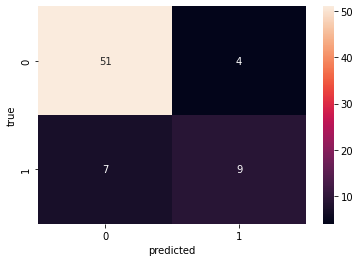

In [208]:
sn.heatmap(cm, annot=True,)
plt.xlabel('predicted')
plt.ylabel('true')

In [229]:
clf.predict(["this is some good great text"])

array([1], dtype=int64)

### Prediction on unrated reviews

In [214]:
df_null_rating['clean_review'] = df_null_rating.Review.apply(preprocess)


In [231]:
df_null_rating.head()

,name,location,Date,Rating,Review,Image_Links,good_bad_review,clean_review
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images'],0,want amend email send hour ago rude obnoxious ...
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images'],0,recently go starbucks barry rd kansas city mo....
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images'],0,visit location way work go cup coffee attentio...
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images'],0,recently british royal marines iraq write star...
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images'],0,way catch plane get medium coffee medium hot c...


In [240]:
for index, review in enumerate(df_null_rating.clean_review.values):
    prediction = clf.predict(df_null_rating.clean_review.values)[index]
    if prediction == 0: 
        review = "bad review"
    else:
        review = "good review"
    print("Review na indexu", index, "je", review, "---->", prediction)


Review na indexu 0 je bad review ----> 0
Review na indexu 1 je bad review ----> 0
Review na indexu 2 je bad review ----> 0
Review na indexu 3 je bad review ----> 0
Review na indexu 4 je bad review ----> 0
Review na indexu 5 je bad review ----> 0
Review na indexu 6 je good review ----> 1
Review na indexu 7 je good review ----> 1
Review na indexu 8 je bad review ----> 0
Review na indexu 9 je bad review ----> 0
Review na indexu 10 je bad review ----> 0
Review na indexu 11 je bad review ----> 0
Review na indexu 12 je bad review ----> 0
Review na indexu 13 je bad review ----> 0
Review na indexu 14 je bad review ----> 0
Review na indexu 15 je bad review ----> 0
Review na indexu 16 je bad review ----> 0
Review na indexu 17 je bad review ----> 0
Review na indexu 18 je bad review ----> 0
Review na indexu 19 je bad review ----> 0
Review na indexu 20 je bad review ----> 0
Review na indexu 21 je bad review ----> 0
Review na indexu 22 je bad review ----> 0
Review na indexu 23 je bad review ----> 0
